# Lesson 0: The Basics

## The Goal: quantify the significance of an observed excess <b>or</b> signal strength to exclude given an observation

Starting simple:

Let's start with two values from a thought experiment, $x \pm \sigma_{x}$ and $y \pm \sigma_{y}$. We will make an assumption here that $\sigma_{x}$ and $\sigma_{y}$ are Gaussian distributed and totally uncorrelated.

Q: How different are these numbers, statistically?

We can quantify this by looking at $ (x-y) / \sigma_{x-y}$ (how many "sigma" are the values separated by). Using standard uncertainty propagation, this is simply:

\begin{align}
n_{\sigma} = \frac{x-y}{\sqrt{\sigma_x^2 + \sigma_y^2}}\\
\end{align}

But what is the probability of this?



In [4]:
import ROOT
import numpy as np
from scipy.stats import norm

In [2]:
colours = [ROOT.kRed+2,ROOT.kOrange-3, ROOT.kGreen+2,ROOT.kBlue-3,ROOT.kViolet-3,ROOT.kMagenta+2]
intervals = [0,1,2,3,4,5]
gaussian_dists = [ROOT.TH1D("gaussian_"+str(v),"gaussian distributions",100,-20,20) for v in intervals]

rnd = ROOT.TRandom(123)

n_toys = 200000
v = 10
i=0

while i < n_toys:
    rnd_number = rnd.Gaus(v,np.sqrt(v)) - v

    for iv,gd in zip(intervals,gaussian_dists):
    
        if np.abs(rnd_number) >= iv*np.sqrt(v):
            gd.Fill(rnd_number)
    i+=1

for iv,col,gd in zip(intervals,colours, gaussian_dists):
    gd.Scale(1./n_toys)
    gd.SetLineColor(ROOT.kBlack)
    gd.SetFillColor(col)
    gd.SetLineWidth(1)
    print 'From our toys, probability of being within ',iv,'sigmal is: ',(1-gd.Integral())*100,'%'
    print '        calculated from scipy: ',2.*(norm.cdf(np.sqrt(10)*iv,0,np.sqrt(10)) - 0.5)*100.,'%'

Welcome to JupyROOT 6.18/00
From our toys, probability of being within  0 sigmal is:  -2.22044604925e-14 %
        calculated from scipy:  0.0 %
From our toys, probability of being within  1 sigmal is:  68.1105 %
        calculated from scipy:  68.26894921370858 %
From our toys, probability of being within  2 sigmal is:  95.4685 %
        calculated from scipy:  95.44997361036415 %
From our toys, probability of being within  3 sigmal is:  99.7175 %
        calculated from scipy:  99.73002039367398 %
From our toys, probability of being within  4 sigmal is:  99.994 %
        calculated from scipy:  99.99366575163337 %
From our toys, probability of being within  5 sigmal is:  100.0 %
        calculated from scipy:  99.99994266968561 %


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


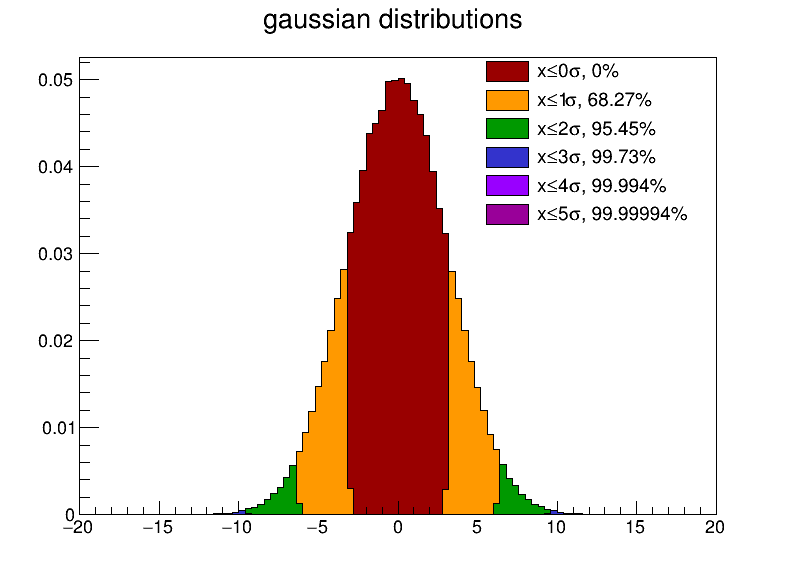

In [7]:
c1 = ROOT.TCanvas("c1","c1",800,600)
leg= ROOT.TLegend(0.6,0.6,0.9,0.9)
leg.SetBorderSize(0); leg.SetFillStyle(0)

ROOT.gStyle.SetOptStat(0)
pct = [0,68.27,95.45,99.73,99.994,99.99994]
for i,(pct,iv,pd) in enumerate(zip(pct,intervals,gaussian_dists)):
    if i==0: pd.Draw("hist")
    else: pd.Draw("hist same")
    leg.AddEntry(pd,"x#leq"+str(iv)+"#sigma, "+str(pct)+"%","f")
leg.Draw()
c1.SetLogy(0) #show the tails by changing this to 1!
c1.Draw()

But recall, what we wanted to do was calculate the probability of our two values being in agreement, given that they are $n_{\sigma}$ apart. For this, we can flip the calculation around. 

Let's calculate this for $20 \pm 8$ and $50 \pm 18$. Naively, one might think these numbers are quite different.

However, we have $n_{\sigma} = 30 / \sqrt{8^2 + 18^2} = 1.52 \sigma$

In [8]:
print 'Probability calculated from scipy: ',(1. - 2.*(1-norm.cdf(1.52)))*100.,'%'

Probability calculated from scipy:  87.14890243621282 %


So there is an 87% chance that these values are compatible, or, only a 13% chance that they are incompatible.

This probability of incompatibility is our $p$-value.

The $p$-value is more properly defined as "the probability that the process would produce a measurement this far, or further, from the ideal mean".

In our case, it turns out that probability was quite high!

Let's extend this to more practical terms in Lesson 1: The Poisson Distribution